<h1 style="border: 2px solid black; padding: 15px; border-radius: 12px;" align='center'>IA pour la cybersécurité</h1>    

<h2 align='center'> Chapitre 1 : Introduction et rappels </h2>

<h3 align='center'> Jordy Palafox </h3>
<h3 align='center'> Ing3 CS - 2024/2025 </h3>
      
      
<div style="display:flex">
    <img src="cytech.png", style="width:250px;height:50">
    <img src="cyu.jfif", style="width:300px;height:100px">
</div>

On va considérer un jeu de données tabulaire contenant des logiciels dont certains sont des malwares.

Après avoir mené une analyse exploratoire des données, on créera un classifieur et mettant en oeuvre les démarches classiques de ML
(preprocessing, Crossvalidation, optimisation d'hyperparamètres, features importance).

+ Proposer une analyse exploratoire de données (ACP, clustering etc)
+ Entraîner 3 modèles : Regression Lasso (GridSearch), XGBoost (utiliser les valeurs SHAP pour comprendre les features importantes), un réseau fully-connect (utiliser tous les outils classiques d'optimisation d'entrainements, Neptuna)
+ Comparer les trois modèles !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('file_pe_headers.csv')

In [3]:
df

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [4]:
df.dtypes

Name                            object
e_magic                          int64
e_cblp                           int64
e_cp                             int64
e_crlc                           int64
                                 ...  
ImageDirectoryEntryExport        int64
ImageDirectoryEntryImport        int64
ImageDirectoryEntryResource      int64
ImageDirectoryEntryException     int64
ImageDirectoryEntrySecurity      int64
Length: 79, dtype: object

In [5]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Name[object],1. winhttp.dll2. VirusShare_a878ba26000edaac5c93. VirusShare_ef9130570fddc174b314. VirusShare_ef84cdeba22be72a69b5. VirusShare_6bf3608e60ebc16cbcf6. VirusShare_2cc94d952b2efb13c7d7. VirusShare_eff7676f69be2b519f38. VirusShare_e76cac211258723745f9. VirusShare_cef6cdf0e85303a461f10. VirusShare_59af5dfb0c79537eedd11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)19,601 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,e_magic[int64],1. 23117,"19,611 (100.0%)",,0(0.0%)
3,e_cblp[int64],Mean (sd) : 178.6 (987.2)min < med < max:0.0 < 144.0 < 59448.0IQR (CV) : 0.0 (0.2),39 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
4,e_cp[int64],Mean (sd) : 71.7 (1445.2)min < med < max:0.0 < 3.0 < 63200.0IQR (CV) : 0.0 (0.0),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
5,e_crlc[int64],Mean (sd) : 49.1 (1212.2)min < med < max:0.0 < 0.0 < 64613.0IQR (CV) : 0.0 (0.0),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/Te

In [6]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

/home/max/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:11 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Je vous laisserai mener votre propre Analyse Exploratoire de Données et m'en proposer une !

In [7]:
y = df["Malware"]
X = df.drop(["Name", "Malware"], axis=1).to_numpy()

In [8]:
X

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [9]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

In [10]:
y.value_counts()

Malware
1    14599
0     5012
Name: count, dtype: int64

In [11]:
14590/len(X)*100

74.39702207944521

On peut remarquer que les classes ne sont pas très équilibrées !

Un classifieur naïf qui prédirait toujours 1 (non malveillant) ferait 74.39 % de bonnes réponses. On va voir si on peut faire mieux !

# Modélisation

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## XGBoost

In [13]:
from xgboost import XGBClassifier
import xgboost

XGB_model_instance = XGBClassifier()
XGB_model_instance.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
y_test_pred = XGB_model_instance.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 99.07%


In [16]:
import shap

In [17]:
# Fits the explainer
explainer = shap.Explainer(XGB_model_instance.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 5885it [05:09, 18.51it/s]                          


In [18]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

PermutationExplainer explainer:  91%|█████████ | 17855/19611 [22:11<02:11, 13.32it/s] 


KeyboardInterrupt: 

In [50]:
shap.plots.bar(shap_values)

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

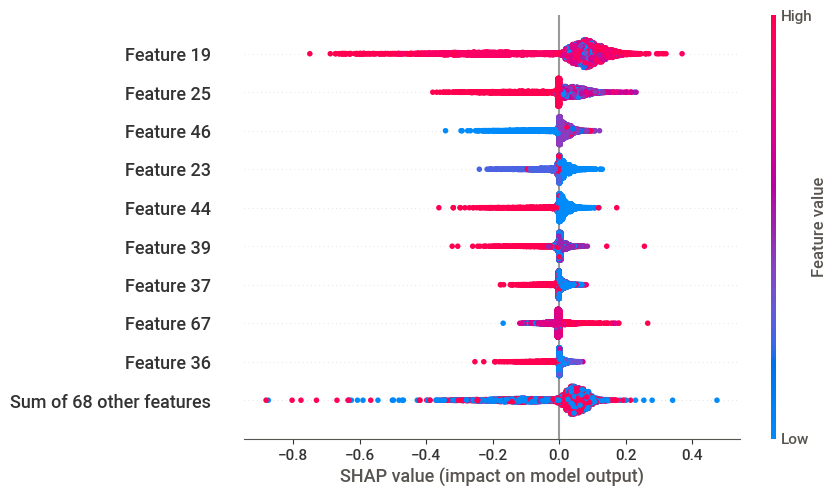

In [45]:
shap.plots.beeswarm(shap_values)

Explorer de la même manière la librairie LIME

# Comparons à un réseau de neurones

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-09-23 18:30:55.591878: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 18:30:55.592405: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 18:30:55.594606: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 18:30:55.602878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 18:30:55.616712: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [28]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/max/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=150, batch_size=128)

Epoch 1/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7564 - loss: 110425368.0000
Epoch 2/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 154688800.0000
Epoch 3/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8286 - loss: 270810784.0000
Epoch 4/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 85490928.0000
Epoch 5/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 69422256.0000
Epoch 6/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 211782032.0000
Epoch 7/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 128323048.0000
Epoch 8/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 111143552.0000
Epoch 9/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 115080976.0000
Epoch 10/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 21246540.0000
Epoch 11/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [51]:
model.evaluate(X_test, y_test)

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8880 - loss: 8358.7549


[23166.48046875, 0.8873215317726135]